# Notebook Contents

- [Imports](#Imports)
- [Data](#Data)
- [Pitcher Overview](#Pitcher-Overview)
    - [General Pitch Data](#General-Pitch-Data)
    - [Pitch Usage](#Pitch-Usage)
    - [Pitch Usage by Batter Handedness](#Pitch-Usage-by-Batter-Handedness)
    - [Velocity by Pitch Type](#Velocity-by-Pitch-Type)
    - [Pitch Velocity by Pitch Number](#Pitch-Velocity-by-Pitch-Number)
- [Pitcher Stuff](#Pitcher-Stuff)
    - [Spin Rate by Pitch Type](#Spin-Rate-by-Pitch-Type)
    - [Velocity & Spin Rate](#Velocity-&-Spin-Rate)
    - [Spin Axis](#Spin-Axis)
    - [Spin Efficiency](#Spin-Efficiency)
    - [HB & VB Axis](#Horizontal-&-Vertical-Break-Axis)
    - [HB & HB Due to Magnus Force](#Horizontal-&-Vertical-Break-Due-to-Magnus-Force-Axis)
    - [Release Position](#Release-Postion)
    - [Release Extension](#Release-Extension-(Side))
    - [Avg. Bauer Units by Pitch Type](#Bauer-Units)
- [Count Breakdown](#Count-Breakdown)
    - [Pitch Usage by Count](#Pitch-Usage-by-Count)
- [Heatmaps](#Heatmaps)
    - [Pitch Location by Pitch Type](#Pitch-Location-by-Pitch-Type)
    - [Qaulity Contact Heatmap - All Pitches](#Launch-Speed-Angle)
    - [4-Seam Heatmaps](#Fastball-Heatmaps)
    - [Slider Heatmaps](#Slider-Heatmaps)
    - [Changeup Heatmaps](#Changeup-Heatmaps)
    - [Curveball Heatmaps](#Curveball-Heatmaps)
    - [Cutter Heatmaps](#Cutter-Heatmaps)

# Imports

In [1]:
import math
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
scherzer = pd.read_csv('../data/max-scherzer.csv')
scherzer.drop(columns = ['Unnamed: 0'], inplace = True)

# Font Dictionary
font_title = {
    'size': 14,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(scherzer.shape)
scherzer.head(2)

(2821, 84)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,post_away_score,post_home_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,Mx,Mz,phi,theta,is_strike,pitch_count,plate_-x,pfx_-x,M-x,spin_eff,spin_eff%,true_spin,bauer_units,swing_miss
0,CU,2021-05-30,78.4,-3.37,5.41,"Scherzer, Max",592885,453286,strikeout,called_strike,13,Christian Yelich called out on strikes.,L,R,WSH,MIL,S,2.0,NaN,1,2,2021,1.44,-7.92,-0.40,1.33,NaN,NaN,NaN,2,6,Top,NaN,NaN,543228,3.766094,-114.087175,-0.635098,11.622331,24.334756,-37.945221,3.04,1.47,NaN,NaN,NaN,78.2,2685.0,6.5,633933,53.99,NaN,NaN,0.0,1.0,0.0,0.0,NaN,38,4,Curveball,0,2,2,0,Infield shift,Standard,65.0,0.008,-0.073,NaN,NaN,NaN,NaN,1,1-2,0.40,-17.28,NaN,NaN,NaN,NaN,34.247449,0
1,FF,2021-05-30,94.2,-3.17,5.54,"Scherzer, Max",592885,453286,NaN,swinging_strike,5,Christian Yelich called out on strikes.,L,R,WSH,MIL,S,NaN,NaN,1,1,2021,-1.26,17.64,0.03,2.62,NaN,NaN,NaN,2,6,Top,NaN,NaN,543228,11.089716,-136.567105,-5.050376,-18.326595,31.502316,-12.881321,3.49,1.60,NaN,NaN,NaN,93.7,2651.0,6.3,633933,54.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,3,4-Seam Fastball,0,2,2,0,Infield shift,Standard,226.0,0.000,-0.027,NaN,NaN,NaN,NaN,1,1-1,-0.03,15.12,NaN,NaN,NaN,NaN,28.142251,1


In [3]:
gen_pd = scherzer[['pitch_type', 'release_speed', 'release_spin_rate',
                   'true_spin', 'spin_eff', 'phi', 'pfx_z', 'pfx_-x',
                   'is_strike', 'release_pos_x', 'release_pos_z', 'bauer_units']]
col_dict = {
    'release_speed': 'velo', 'release_spin_rate': 'spin', 'phi': 'spin_axis', 'pfx_z': 'hb', 'pfx_-x': 'vb',
    'is_strike': 'strike', 'release_pos_z': 'r_height', 'release_pos_x': 'r_side'
}
gen_pd.rename(columns = col_dict, inplace = True)

In [4]:
# scherzer.pitch_type.value_counts(normalize=True)
r_scherzer = scherzer.loc[(scherzer['player_name'] == 'Scherzer, Max') & (scherzer['stand'] == 'R')].copy()
l_scherzer = scherzer.loc[(scherzer['player_name'] == 'Scherzer, Max') & (scherzer['stand'] == 'L')].copy()
# all hitters
ff = scherzer.loc[scherzer['pitch_type'] == 'FF']
sl = scherzer.loc[scherzer['pitch_type'] == 'SL']
ch = scherzer.loc[scherzer['pitch_type'] == 'CH']
cu = scherzer.loc[scherzer['pitch_type'] == 'CU']
fc = scherzer.loc[scherzer['pitch_type'] == 'FC']
# RHH
r_ff = r_scherzer.loc[r_scherzer['pitch_type'] == 'FF']
r_sl = r_scherzer.loc[r_scherzer['pitch_type'] == 'SL']
r_ch = r_scherzer.loc[r_scherzer['pitch_type'] == 'CH']
r_cu = r_scherzer.loc[r_scherzer['pitch_type'] == 'CU']
r_fc = r_scherzer.loc[r_scherzer['pitch_type'] == 'FC']
# LHH
l_ff = l_scherzer.loc[l_scherzer['pitch_type'] == 'FF']
l_sl = l_scherzer.loc[l_scherzer['pitch_type'] == 'SL']
l_ch = l_scherzer.loc[l_scherzer['pitch_type'] == 'CH']
l_cu = l_scherzer.loc[l_scherzer['pitch_type'] == 'CU']
l_fc = l_scherzer.loc[l_scherzer['pitch_type'] == 'FC']
order = ['FF', 'SL', 'CH', 'CU', 'FC']

# Pitcher Overview

### General Pitch Data

In [5]:
gen_pd.groupby(['pitch_type'], sort = False).mean()

,velo,spin,true_spin,spin_eff,spin_axis,hb,vb,strike,r_side,r_height,bauer_units
pitch_type,,,,,,,,,,,
CU,76.863538,2660.692029,1203.605550,0.454450,411.534031,-7.939495,-13.447798,0.613718,-3.232708,5.609061,34.622552
FF,94.298480,2435.912614,1687.460687,0.700331,215.693182,16.034134,10.608784,0.684650,-3.220585,5.560691,25.836233
FC,90.224219,2474.929688,539.441931,0.220207,185.703448,8.931094,1.021406,0.687500,-3.338398,5.400547,27.432468
CH,84.980048,1446.159145,1111.532851,0.778594,261.535316,3.952019,15.156200,0.577197,-3.292233,5.437577,17.014666
SL,85.896915,2273.237750,291.186532,0.131012,158.500000,4.634483,-2.915281,0.691470,-3.332087,5.452777,26.470530


### Pitch Usage

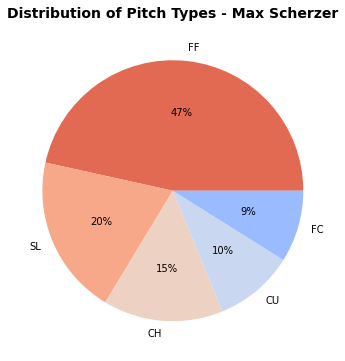

In [6]:
plt.figure(figsize = (8, 6))

dist = round(scherzer.pitch_type.value_counts(normalize = True), 2)
color = sns.color_palette('coolwarm_r')
plt.pie(dist, labels = order, colors = color, autopct = '%.0f%%')
plt.title('Distribution of Pitch Types - Max Scherzer', fontdict = font_title, pad = 15);

### Pitch Usage by Batter Handedness

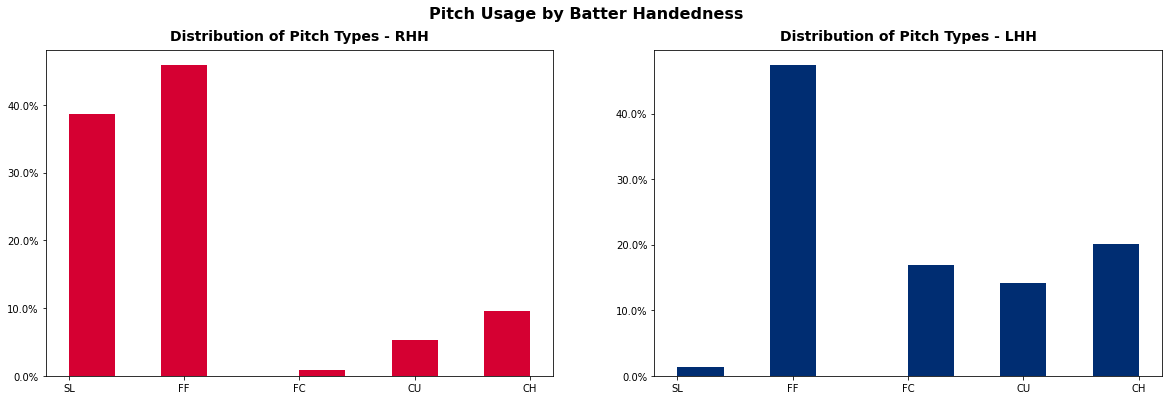

In [7]:
blue = '#002D72'
red = '#D50032'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Batter Handedness', fontsize = 16, fontweight = 'bold')

dist_r = r_scherzer.pitch_type.sort_values(ascending = False)
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = red)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHH', fontdict = font_title, pad = 15)

dist_l = l_scherzer.pitch_type.sort_values(ascending = False)
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = blue)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHH', fontdict = font_title, pad = 15);

### Velocity by Pitch Type

4-Seam velo sits: 94 - 95 mph,  max: 98.0 mph
Slider velo sits: 85 - 87 mph,  max: 90.0 mph
Changeup velo sits: 84 - 86 mph,  max: 89.0 mph
Curve velo sits: 76 - 78 mph,  max: 80.6 mph
Cutter velo sits: 90 - 91 mph,  max: 93.4 mph


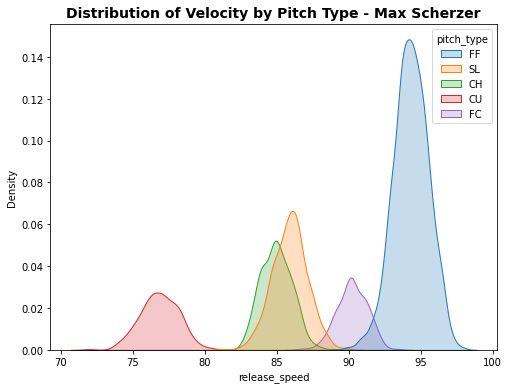

In [8]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = scherzer, x = 'release_speed', shade = 'fill', hue = 'pitch_type',
            hue_order = order, palette = 'tab10')
plt.title('Distribution of Velocity by Pitch Type - Max Scherzer', fontdict = font_title, pad = 12);
print('4-Seam velo sits:',round(ff['release_speed'].quantile(.25)),'-',round(ff['release_speed'].quantile(.75)), 
      'mph, ','max:',round(ff['release_speed'].max(),2),'mph')
print('Slider velo sits:',round(sl['release_speed'].quantile(.25)),'-',round(sl['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(sl['release_speed'].max(), 2), 'mph')
print('Changeup velo sits:',round(ch['release_speed'].quantile(.25)),'-',round(ch['release_speed'].quantile(.75)),
      'mph, ','max:',round(ch['release_speed'].max(), 2),'mph')
print('Curve velo sits:',round(cu['release_speed'].quantile(.25)),'-',round(cu['release_speed'].quantile(.75)), 
      'mph, ','max:',round(cu['release_speed'].max(), 2),'mph')
print('Cutter velo sits:',round(fc['release_speed'].quantile(.25)),'-',round(fc['release_speed'].quantile(.75)),
      'mph, ','max:',round(fc['release_speed'].max(), 2),'mph')

### Pitch Velocity by Pitch Number

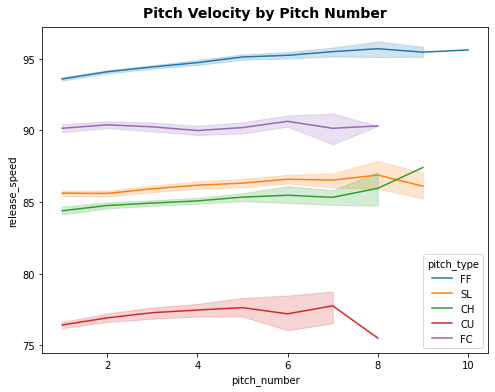

In [9]:
plt.figure(figsize = (8, 6))

sns.lineplot(data = scherzer, x = 'pitch_number', y = 'release_speed', hue = 'pitch_type',
             hue_order = order, palette = 'tab10')
plt.title('Pitch Velocity by Pitch Number', fontdict = font_title, pad = 15);

# Pitcher Stuff

### Spin Rate by Pitch Type

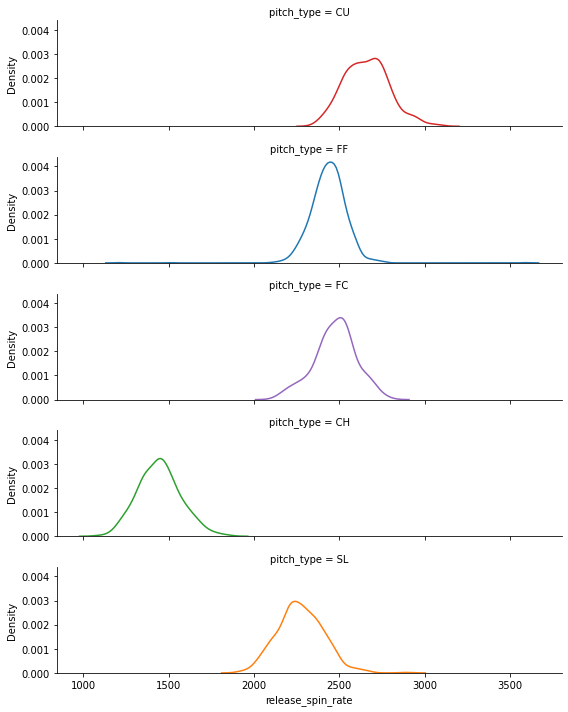

In [10]:
g = sns.FacetGrid(scherzer, row = 'pitch_type', hue = 'pitch_type', 
                  height = 2, aspect = 4, hue_order = order)
g.map(sns.kdeplot, 'release_spin_rate', palette = 'tab10', hue_order = order);

### Velocity & Spin Rate

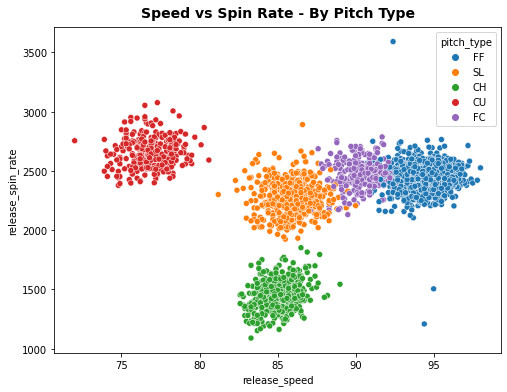

In [11]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = scherzer, x = 'release_speed', y = 'release_spin_rate', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.title('Speed vs Spin Rate - By Pitch Type', fontdict = font_title, pad = 15);

### Spin Axis

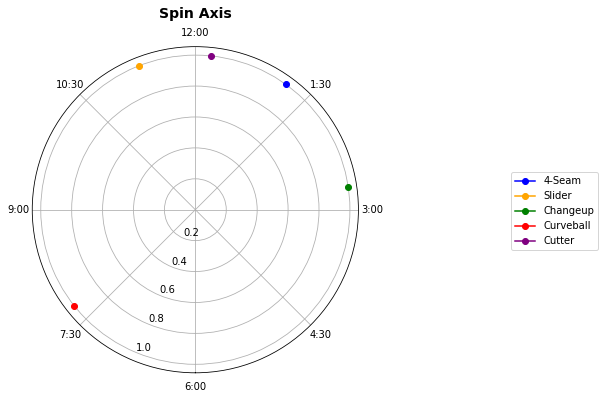

In [12]:
ff_tilt = ff['phi'].mean()
sl_tilt = sl['phi'].mean()
ch_tilt = ch['phi'].mean()
cu_tilt = cu['phi'].mean()
fc_tilt = fc['phi'].mean()
ax = plt.figure(figsize = (8, 6))
ax = plt.subplot(polar = True, theta_direction = -1)
ax.plot(math.radians(ff_tilt), 1, color = 'blue', marker = 'o', label = '4-Seam')
ax.plot(math.radians(sl_tilt), 1, color = 'orange', marker = 'o', label = 'Slider')
ax.plot(math.radians(ch_tilt), 1, color = 'green', marker = 'o', label = 'Changeup')
ax.plot(math.radians(cu_tilt), 1, color = 'red', marker = 'o', label = 'Curveball')
ax.plot(math.radians(fc_tilt), 1, color = 'purple', marker = 'o', label = 'Cutter')
ticks = ['6:00', '7:30', '9:00', '10:30', '12:00', '1:30', '3:00', '4:30']
ax.set_xticklabels(ticks)        
ax.legend(bbox_to_anchor=(1.75, .63))
ax.set_theta_zero_location("S")
ax.set_title('Spin Axis', fontdict = font_title, pad = 15);

### Spin Efficiency

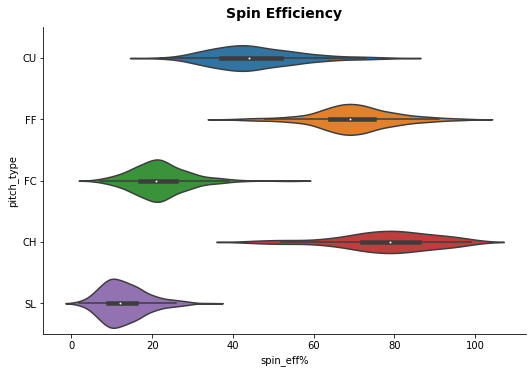

In [13]:
sns.catplot(data = scherzer, x = 'spin_eff%', y = 'pitch_type', kind = 'violin', aspect= 1.5, palette = 'tab10')
plt.title('Spin Efficiency', fontdict = font_title, pad = 15);

### Horizontal & Vertical Break Axis

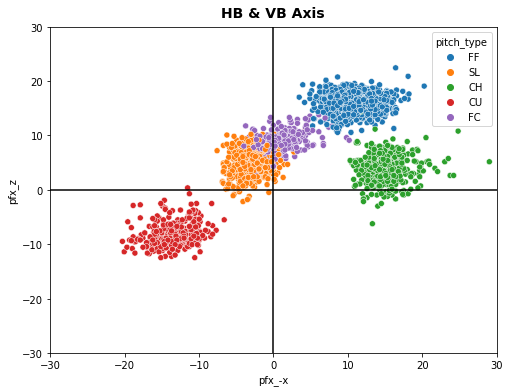

In [14]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = scherzer, x = 'pfx_-x', y = 'pfx_z', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black'), plt.axvline(0, color = 'black')
plt.title('HB & VB Axis', fontdict = font_title, pad = 15);

### Horizontal & Vertical Break Due to Magnus Force Axis

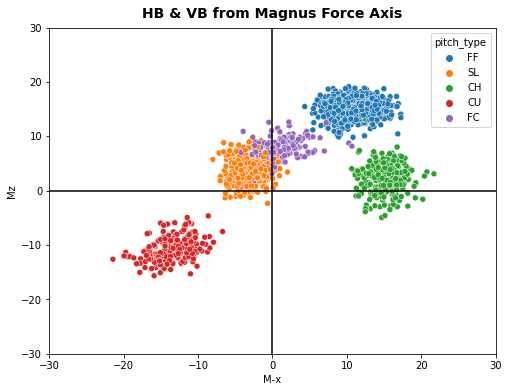

In [15]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = scherzer, x = 'M-x', y = 'Mz', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black'), plt.axvline(0, color = 'black')
plt.title('HB & VB from Magnus Force Axis', fontdict = font_title, pad = 15);

### Release Postion

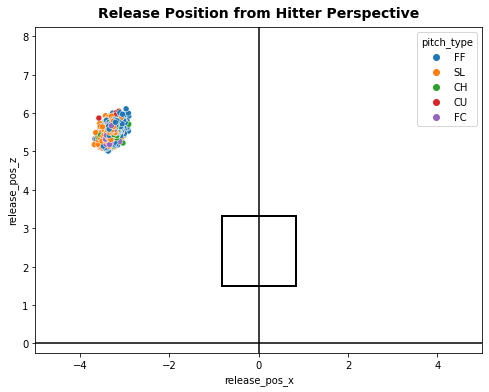

In [16]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = scherzer, x = 'release_pos_x', y = 'release_pos_z', hue = 'pitch_type', 
                 hue_order = order, palette = 'tab10')
plt.xlim(-5, 5), plt.ylim(-0.25, 8.25)
plt.axvline(0, color = 'black'), plt.axhline(0, color = 'black')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.title('Release Position from Hitter Perspective', fontdict = font_title, pad = 15);

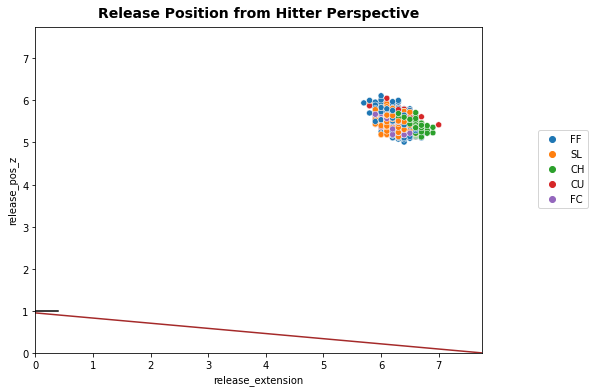

In [17]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = scherzer, x = 'release_extension', y = 'release_pos_z', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.xlim(0, 7.75), plt.ylim(0, 7.75)
plt.axline((0, .95), (7.75,0), color = 'brown'), plt.axhline(1, 0, .05, color = 'black')
plt.legend(bbox_to_anchor=(1.25, .7))
plt.title('Release Position from Hitter Perspective', fontdict = font_title, pad = 15);

### Bauer Units

4-Seam Avg Bauer Units: 25.84
Slider Avg Bauer Units: 26.47
Changeup Avg Bauer Units: 17.01
Curveball Avg Bauer Units: 34.62
Cutter Avg Bauer Units: 27.43


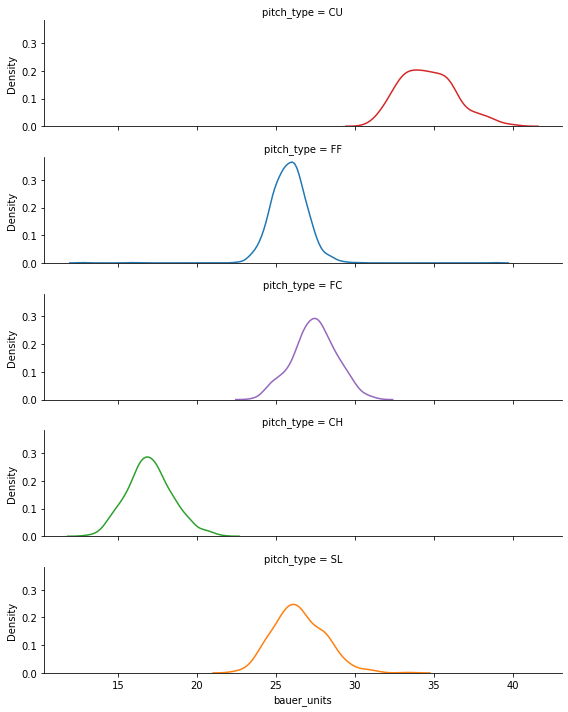

In [18]:
g = sns.FacetGrid(scherzer, row = 'pitch_type', hue = 'pitch_type', height = 2, aspect = 4, hue_order = order)
g.map(sns.kdeplot, 'bauer_units', palette = 'tab10')
print('4-Seam Avg Bauer Units:', round(ff['bauer_units'].mean(), 2))
print('Slider Avg Bauer Units:', round(sl['bauer_units'].mean(), 2))
print('Changeup Avg Bauer Units:', round(ch['bauer_units'].mean(), 2))
print('Curveball Avg Bauer Units:', round(cu['bauer_units'].mean(), 2))
print('Cutter Avg Bauer Units:', round(fc['bauer_units'].mean(), 2));

# Count Breakdown

### Pitch Usage by Count

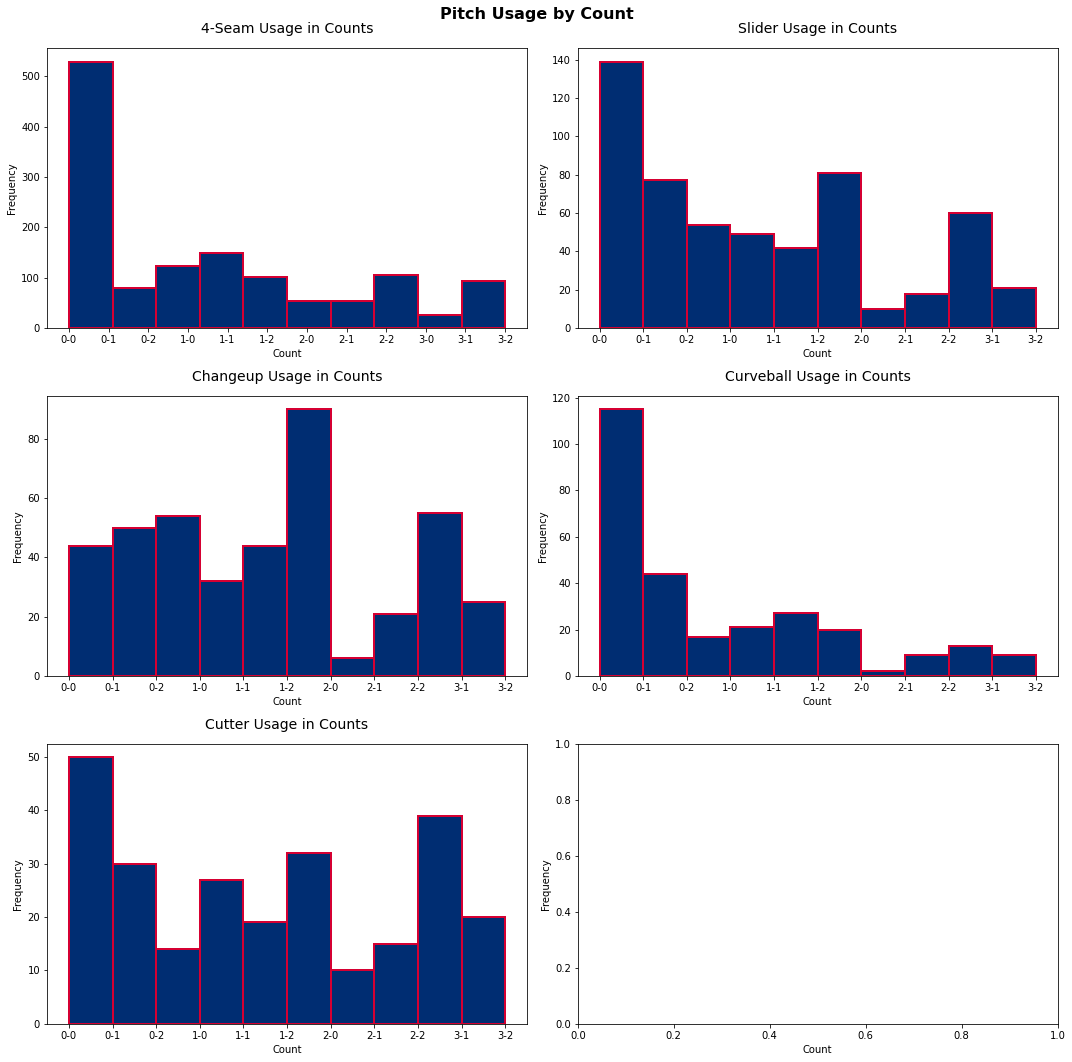

In [19]:
fig, axs = plt.subplots(3, 2, figsize = (15, 15))
fig.suptitle('Pitch Usage by Count', fontsize = 16, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count')
plt.setp(axs[:, 0:], ylabel = 'Frequency')
axs[0][0].hist(ff['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][0].set_title('4-Seam Usage in Counts', fontsize = 14, pad = 15)
axs[0][1].hist(sl['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][1].set_title('Slider Usage in Counts', fontsize = 14, pad = 15)
axs[1][0].hist(ch['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][0].set_title('Changeup Usage in Counts', fontsize = 14, pad = 15)
axs[1][1].hist(cu['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][1].set_title('Curveball Usage in Counts', fontsize = 14, pad = 15)
axs[2][0].hist(fc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][0].set_title('Cutter Usage in Counts', fontsize = 14, pad = 15)
plt.tight_layout();

# Heatmaps
*All From Hitters' Perspective

### Pitch Location by Pitch Type

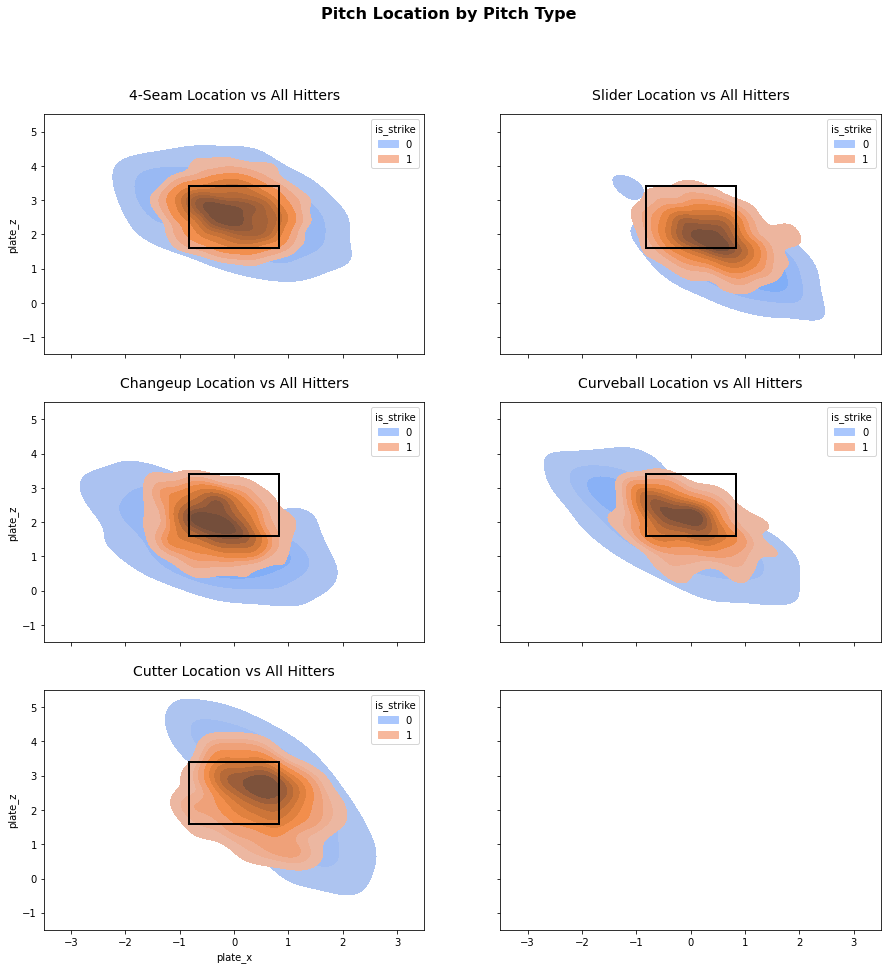

In [20]:
fig, axs = plt.subplots(3, 2, figsize = (15, 15), sharex = True, sharey = True)
fig.suptitle('Pitch Location by Pitch Type', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.kdeplot(ax = axs[0][0],data=ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('4-Seam Location vs All Hitters', fontsize = 14, pad = 15)

sns.kdeplot(ax = axs[0][1],data=sl,x='plate_x',y='plate_z',fill = True,hue='is_strike',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Slider Location vs All Hitters', fontsize = 14, pad = 15)

sns.kdeplot(ax = axs[1][0],data=ch,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Changeup Location vs All Hitters', fontsize = 14, pad = 15)

sns.kdeplot(ax = axs[1][1],data=cu,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Curveball Location vs All Hitters', fontsize = 14, pad = 15)

sns.kdeplot(ax = axs[2][0],data=fc,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[2][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][0].set_title('Cutter Location vs All Hitters', fontsize = 14, pad = 15);

### Launch Speed Angle
1: weak 2: topped 3: under 4: flare/burner 5: solid contact 6: barrel

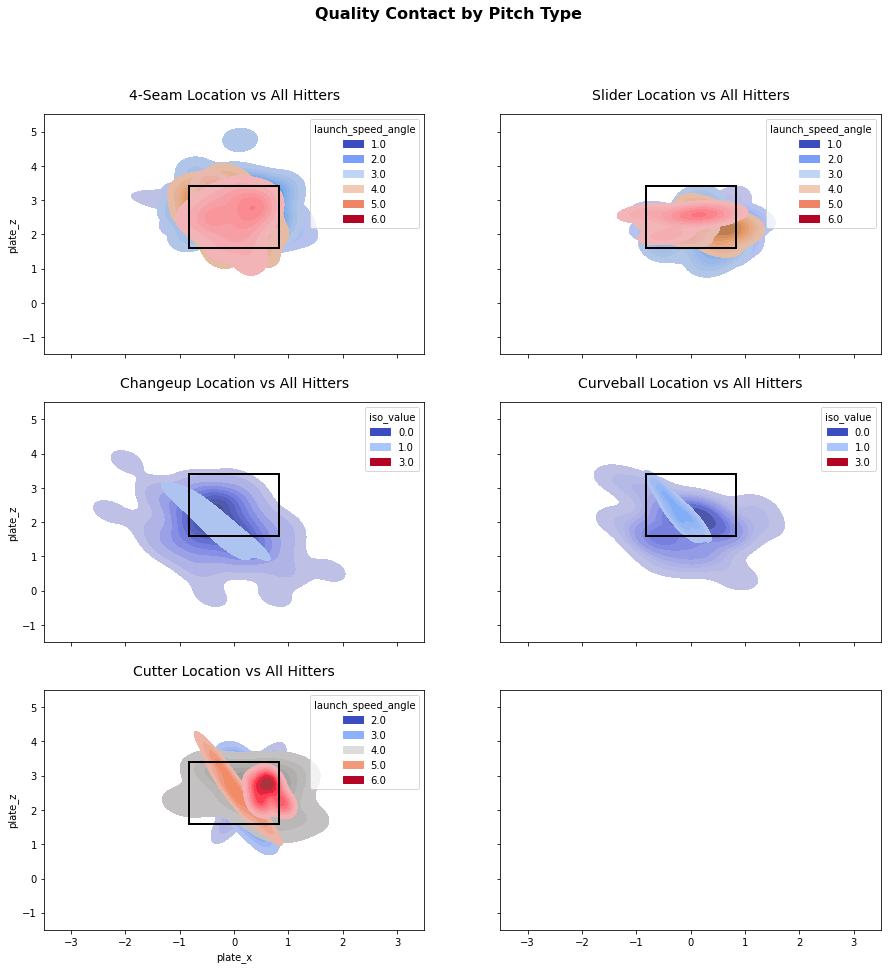

In [21]:
fig, axs = plt.subplots(3, 2, figsize = (15, 15), sharex = True, sharey = True)
fig.suptitle('Quality Contact by Pitch Type', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax=axs[0][0],data=ff,x='plate_x',y='plate_z',fill=True,hue='launch_speed_angle',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('4-Seam Location vs All Hitters', fontsize = 14, pad = 15)
sns.kdeplot(ax=axs[0][1],data=sl,x='plate_x',y='plate_z',fill = True,hue='launch_speed_angle',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Slider Location vs All Hitters', fontsize = 14, pad = 15)
sns.kdeplot(ax=axs[1][0],data=ch,x='plate_x',y='plate_z',fill=True,hue='iso_value',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Changeup Location vs All Hitters', fontsize = 14, pad = 15)
sns.kdeplot(ax=axs[1][1],data=cu,x='plate_x',y='plate_z',fill=True,hue='iso_value',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Curveball Location vs All Hitters', fontsize = 14, pad = 15)
sns.kdeplot(ax=axs[2][0],data=fc,x='plate_x',y='plate_z',fill=True,hue='launch_speed_angle',palette='coolwarm')
axs[2][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][0].set_title('Cutter Location vs All Hitters', fontsize = 14, pad = 15);

### 4-Seam Heatmaps

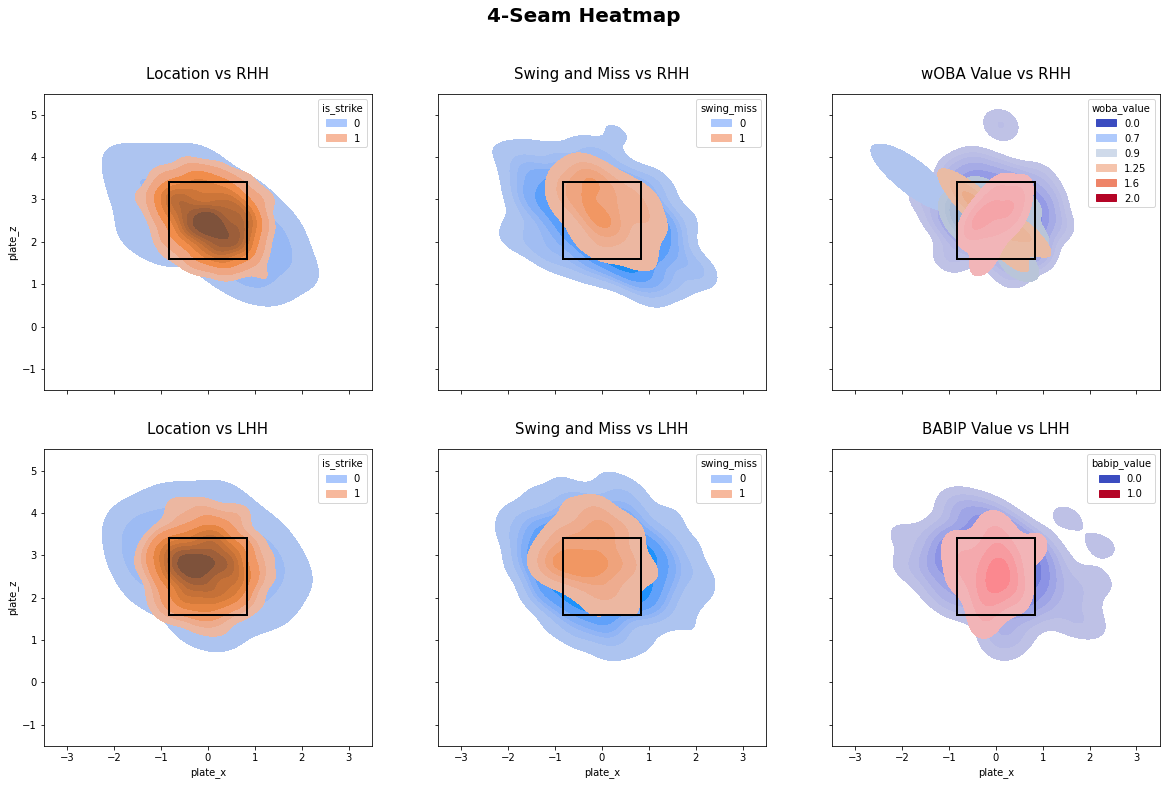

In [22]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('4-Seam Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_ff,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_ff,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_ff,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_ff,x='plate_x',y='plate_z',fill=True,hue='babip_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('BABIP Value vs LHH', fontsize = 15, pad = 15);

### Slider Heatmaps

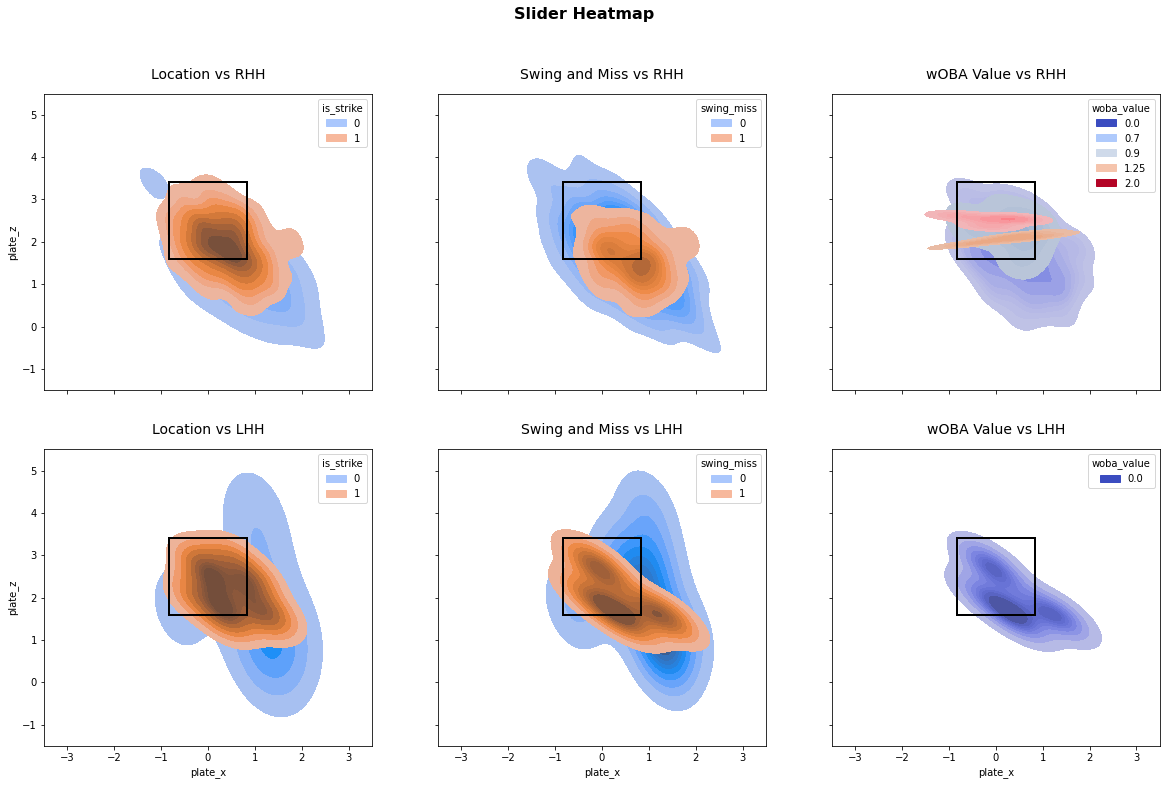

In [23]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slider Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_sl,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_sl,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_sl,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_sl,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_sl,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_sl,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHH', fontsize = 14, pad = 15);

### Changeup Heatmaps

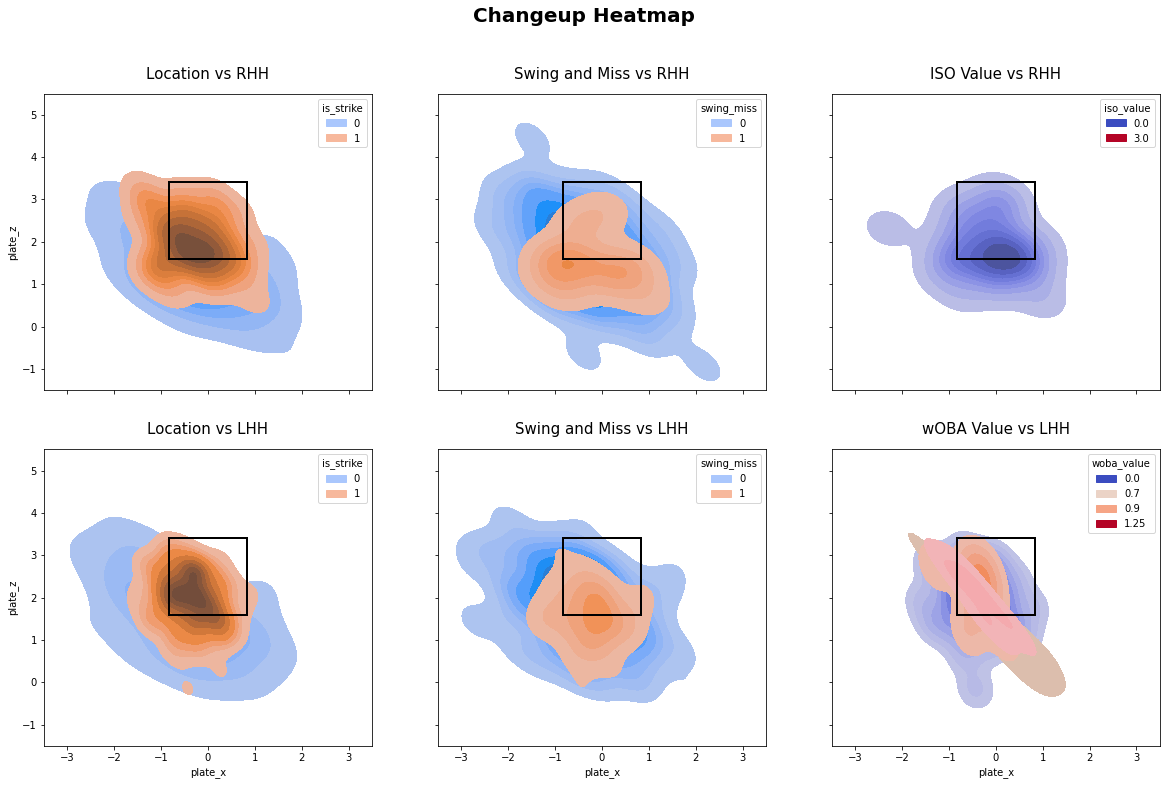

In [24]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Changeup Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_ch,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_ch,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_ch,x='plate_x',y='plate_z',fill=True,hue='iso_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('ISO Value vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_ch,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_ch,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_ch,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHH', fontsize = 15, pad = 15);

### Curveball Heatmaps

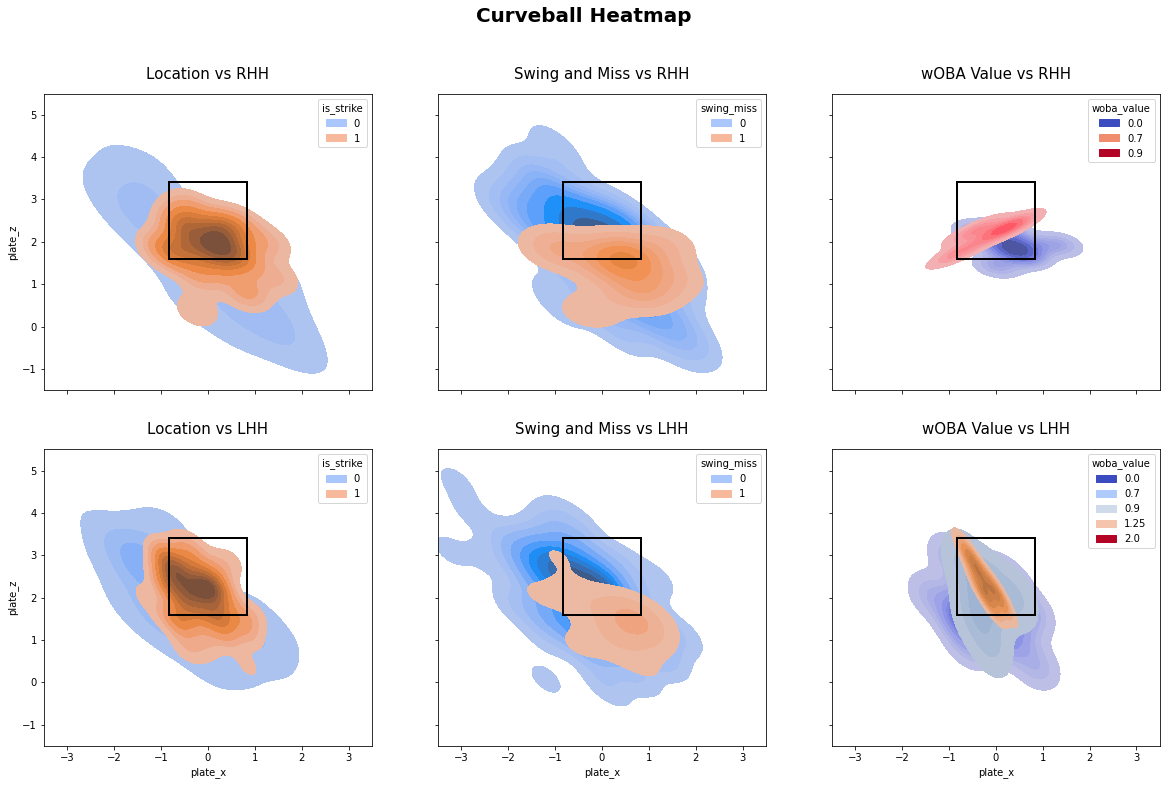

In [25]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Curveball Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_cu,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_cu,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_cu,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_cu,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_cu,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_cu,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHH', fontsize = 15, pad = 15);

### Cutter Heatmaps

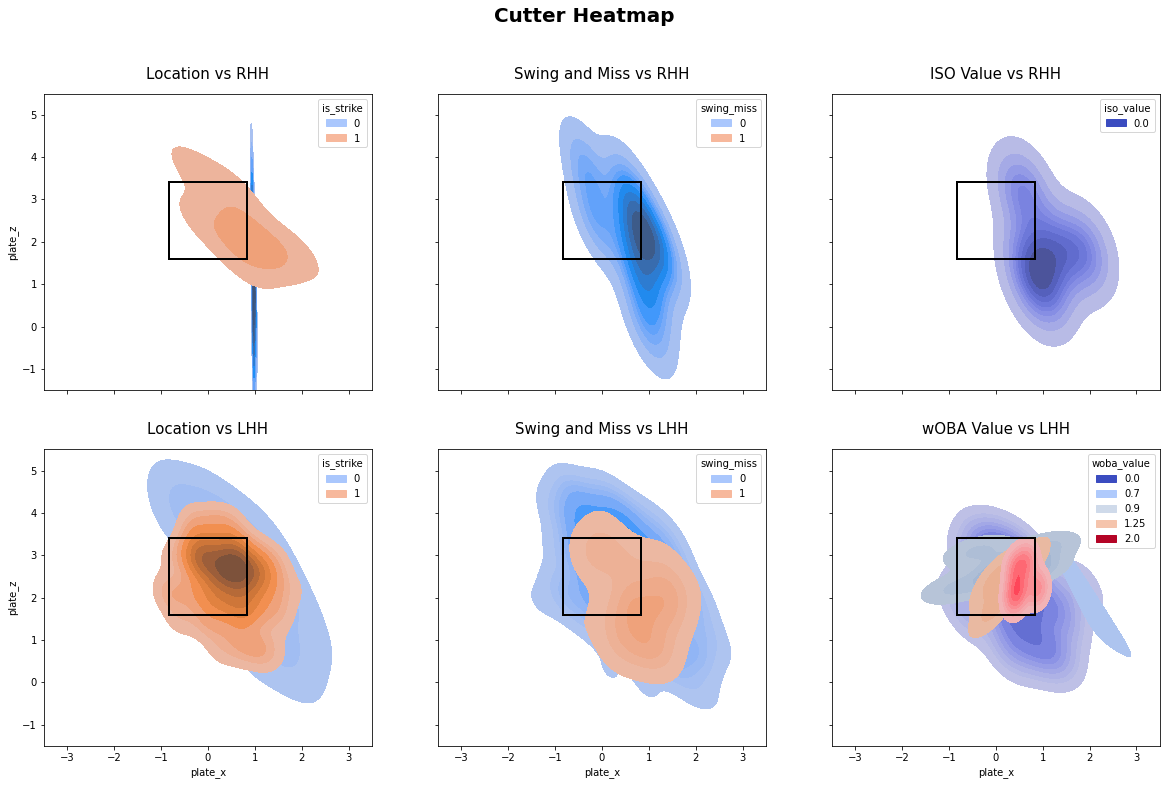

In [26]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Cutter Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_fc,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_fc,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_fc,x='plate_x',y='plate_z',fill=True,hue='iso_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('ISO Value vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_fc,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_fc,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_fc,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHH', fontsize = 15, pad = 15);